<a href="https://www.kaggle.com/code/pawanpatidar9131/predicting-walmart-weekly-sales?scriptVersionId=179507603" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project Title: "Predicting Walmart's Weekly Sales"




***Description of the dataset***

* Store: Store Numbers ranging from 1 to 45
* Date: The Week of Sales. 
* Weekly_Sales: The sales of the given store in the given week
* Holiday_Flag: 1=The week has a Holiday 0=Fully working week
* Temperature: Temperature of the week of sales
* Fuel_Price: Price of the Fuel in the region of the given store
* Unemployment: Unemployment rate of the given store region
* CPI: Customer Price Index 

# BUSINESS UNDERSTANDING

Predicting weekly sales for Walmart stores based on various features like store number, date, holiday flag, temperature, fuel price, CPI, and unemployment.

# Data Understanding

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
walmart=pd.read_csv("/kaggle/input/walmartdata/datawalmart.csv")

# show first five rows by using head()
walmart.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,NaN,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
# check how many column and rows and data types

walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6429 non-null   float64
 5   Fuel_Price    6431 non-null   float64
 6   CPI           6432 non-null   float64
 7   Unemployment  6433 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
# summary statistics for each column
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6429.000000,6431.000000,6432.000000,6433.000000
mean,23.000000,1.046965e+06,0.069930,60.663159,3.359014,171.559889,7.999192
std,12.988182,5.643666e+05,0.255049,18.445967,0.458861,39.356558,1.876175
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.430000,2.933500,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.680000,3.452000,182.613463,7.874000
75%,34.000000,1.420159e+06,0.000000,74.930000,3.735000,212.748046,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
# checking data types
walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
# changing date datatype object to datetime
walmart["Date"]=pd.to_datetime(walmart["Date"], format='%d-%m-%Y')
walmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

## Missing attributes

In [6]:
# checking missing data
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     6
Fuel_Price      4
CPI             3
Unemployment    2
dtype: int64

In [7]:
# fill missing value by mean
walmart.fillna(walmart.mean(),inplace=True)

In [8]:
#checking duplicate value
walmart.duplicated().sum()

0

In [9]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
#split date and convert new column year month and day

walmart['Year'] = walmart['Date'].dt.year
walmart['Month'] = walmart['Date'].dt.month
walmart['Day'] = walmart['Date'].dt.day
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572000,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548000,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,3.359014,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561000,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625000,211.350143,8.106,2010,3,5


In [11]:
# drop date column

walmart.drop('Date', axis= 1, inplace=True)

In [12]:
walmart.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572000,211.096358,8.106,2010,2,5
1,1,1641957.44,1,38.51,2.548000,211.242170,8.106,2010,2,12
2,1,1611968.17,0,39.93,3.359014,211.289143,8.106,2010,2,19
3,1,1409727.59,0,46.63,2.561000,211.319643,8.106,2010,2,26
4,1,1554806.68,0,46.50,2.625000,211.350143,8.106,2010,3,5


<Axes: >

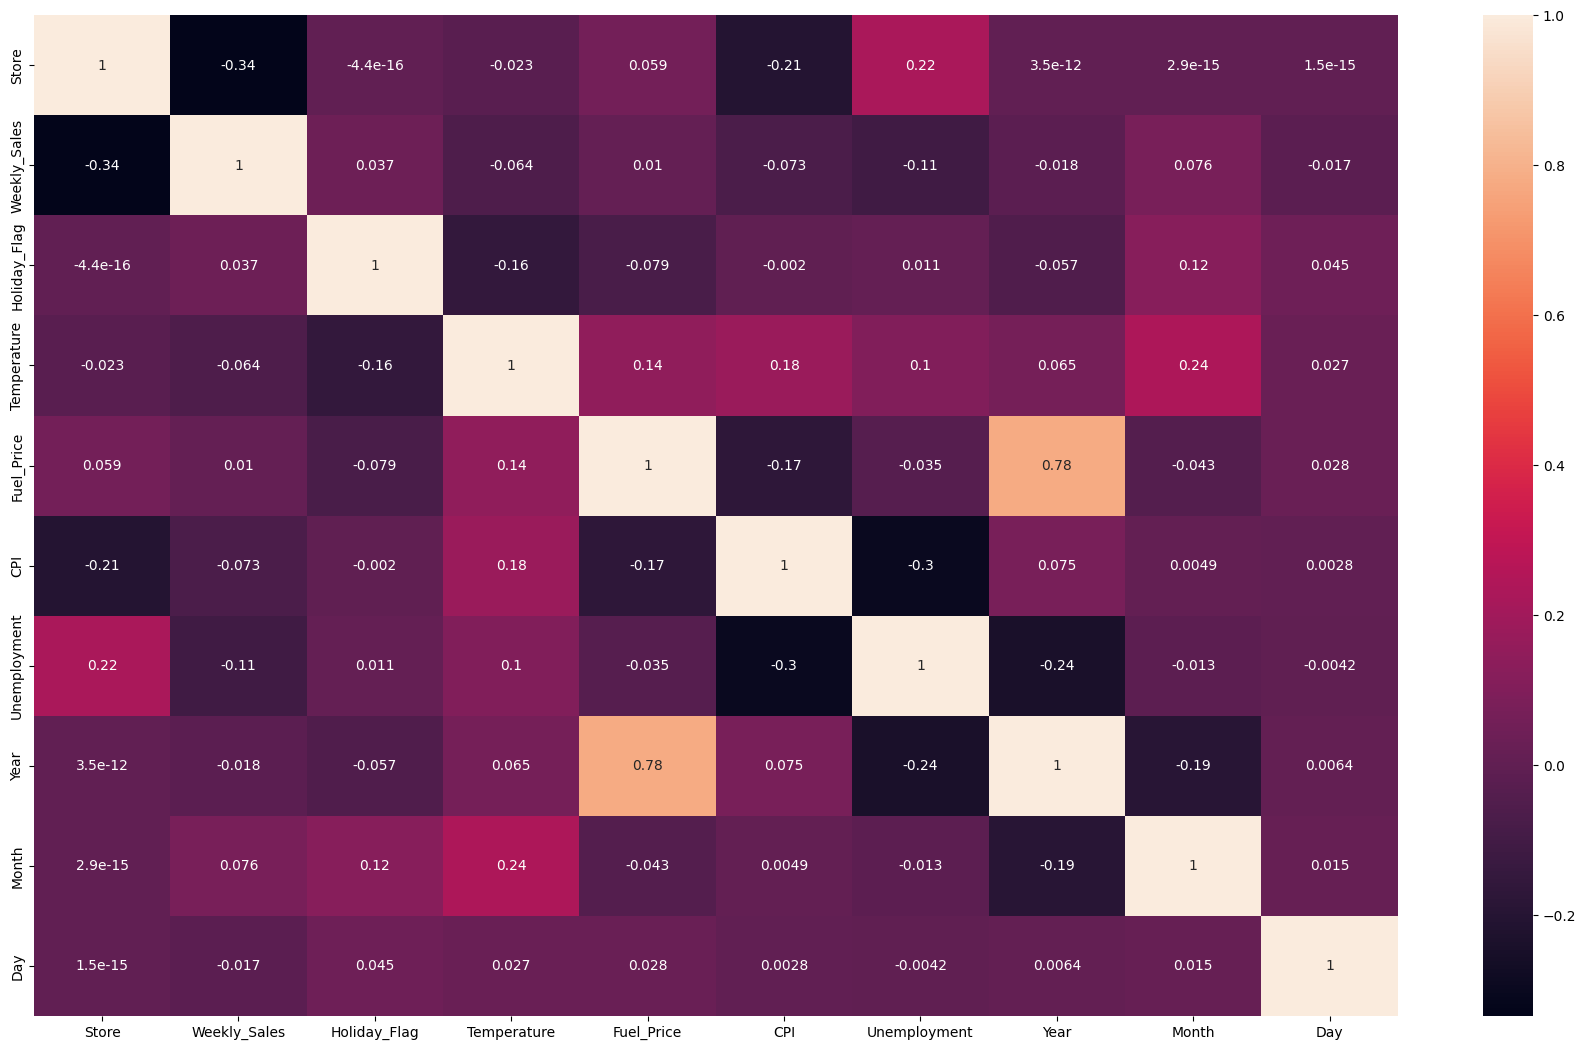

In [13]:
# check relation between variables positive or negative
plt.figure(figsize=(22,13))
sns.heatmap(walmart.corr(),annot=True) 
    

There is positive relationship between weekly sale and month and negative corelation between cpi and weekly sales and temperature also have negative relation with weekly sales

# Exploratory Data Analysis (EDA)

Text(0, 0.5, 'Frequency')

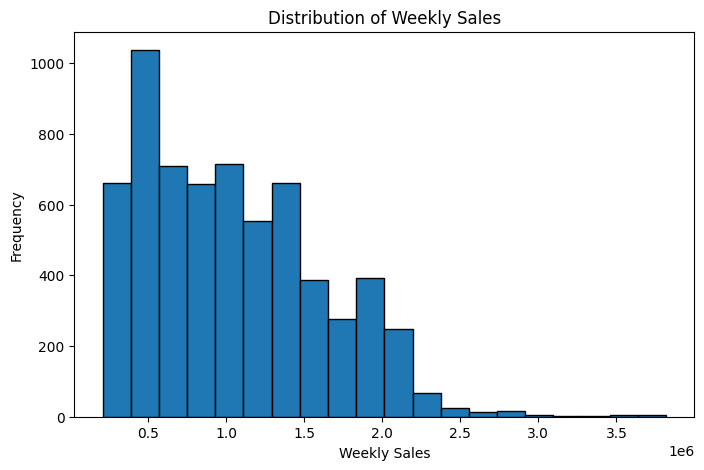

In [14]:
# distribution of weekly sales
plt.figure(figsize=(8, 5))
plt.hist(walmart['Weekly_Sales'], bins=20,edgecolor="k" )
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')


Text(0, 0.5, 'Weekly Sales')

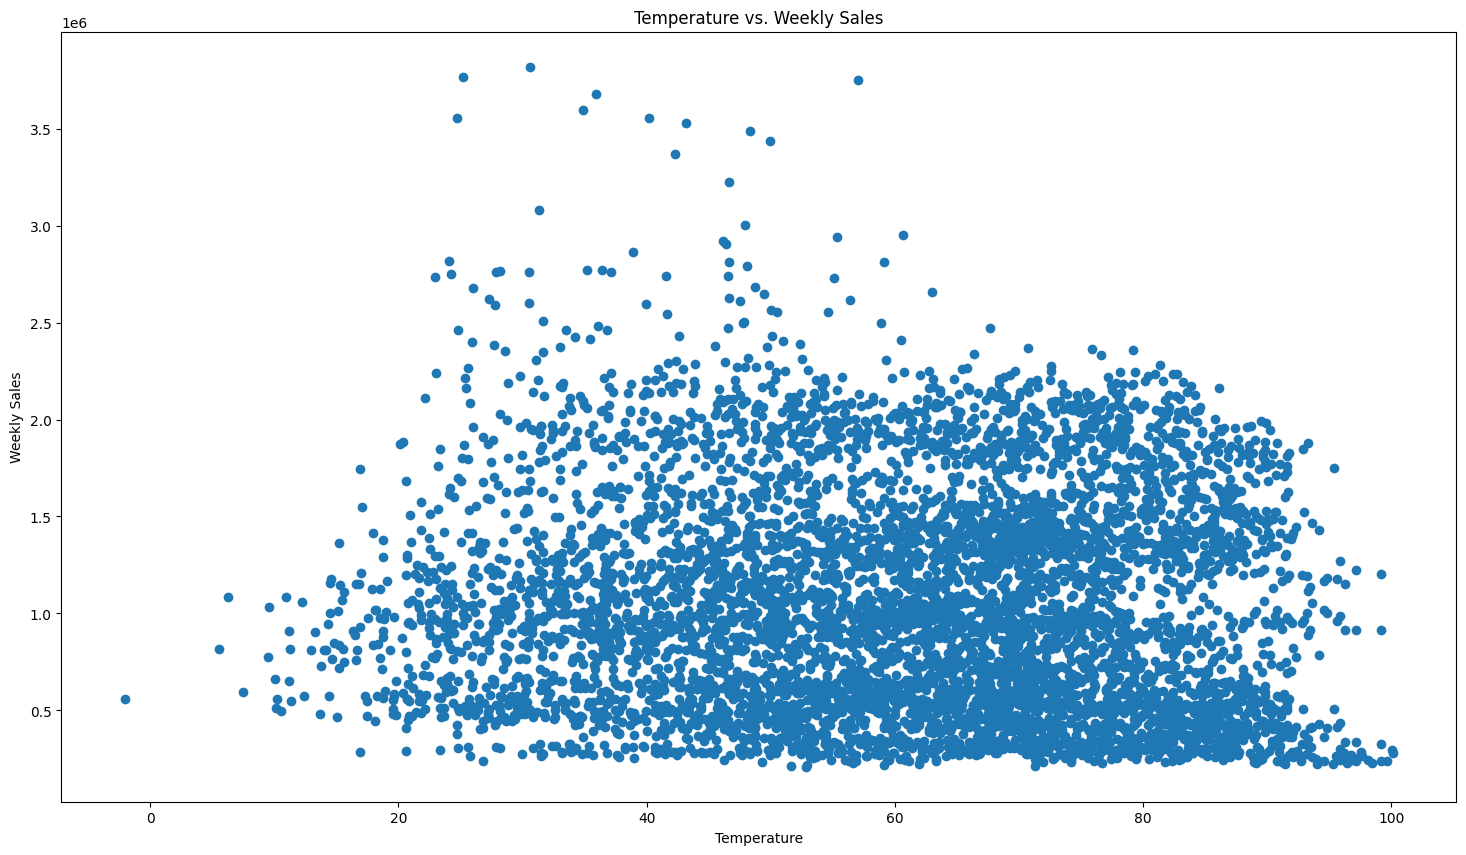

In [15]:
# plotting scatter plot between temperature and weekly sales
plt.figure(figsize=(18,10))
plt.scatter(data=walmart,x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')


Text(0, 0.5, 'Weekly Sales')

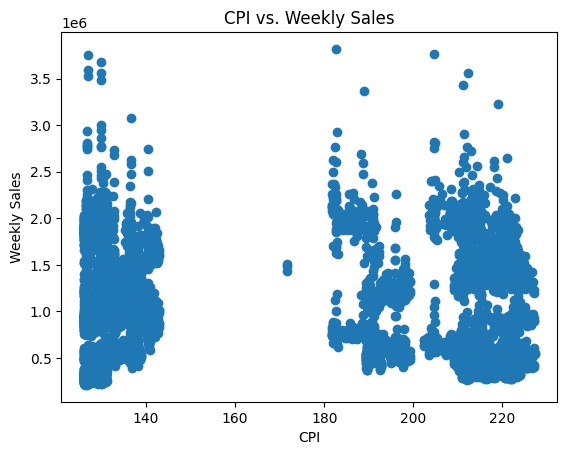

In [16]:
# plot scatter plot between cpi and weekly sale
plt.scatter(data=walmart,x='CPI', y='Weekly_Sales')
plt.title('CPI vs. Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')


 *** Which store has min and max sale***

Text(0, 0.5, 'TOTAL SALE')

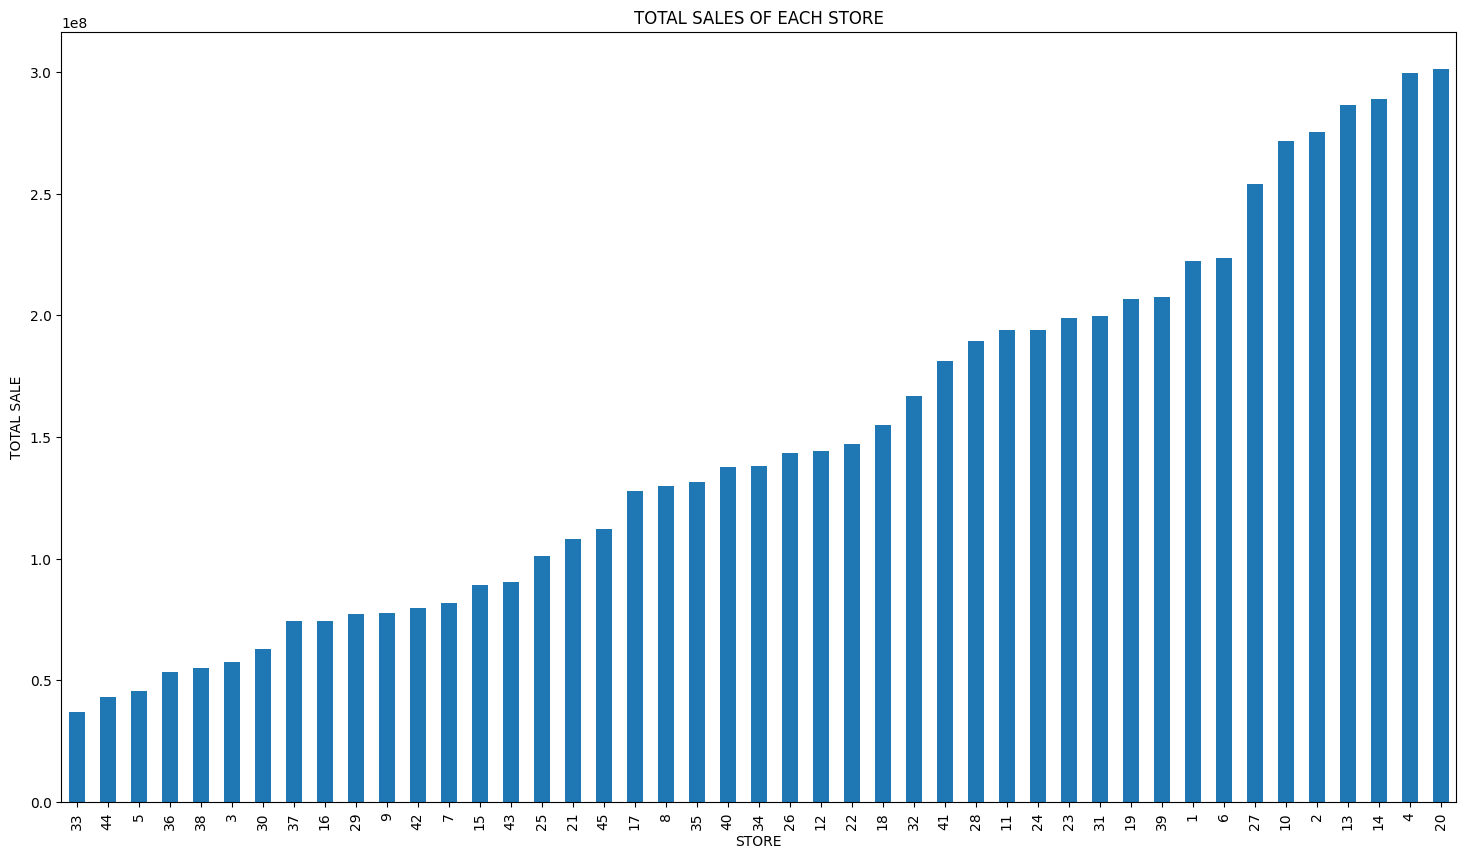

In [17]:
plt.figure(figsize=(18,10))
total_sales_for_each_store = walmart.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store.plot(kind="bar")

plt.title("TOTAL SALES OF EACH STORE")
plt.xlabel("STORE")
plt.ylabel("TOTAL SALE")

***store 4 and 20 have highest weekly sales and store 33 and 44 have lowest weekly sales***

Text(0, 0.5, 'Weekly sales')

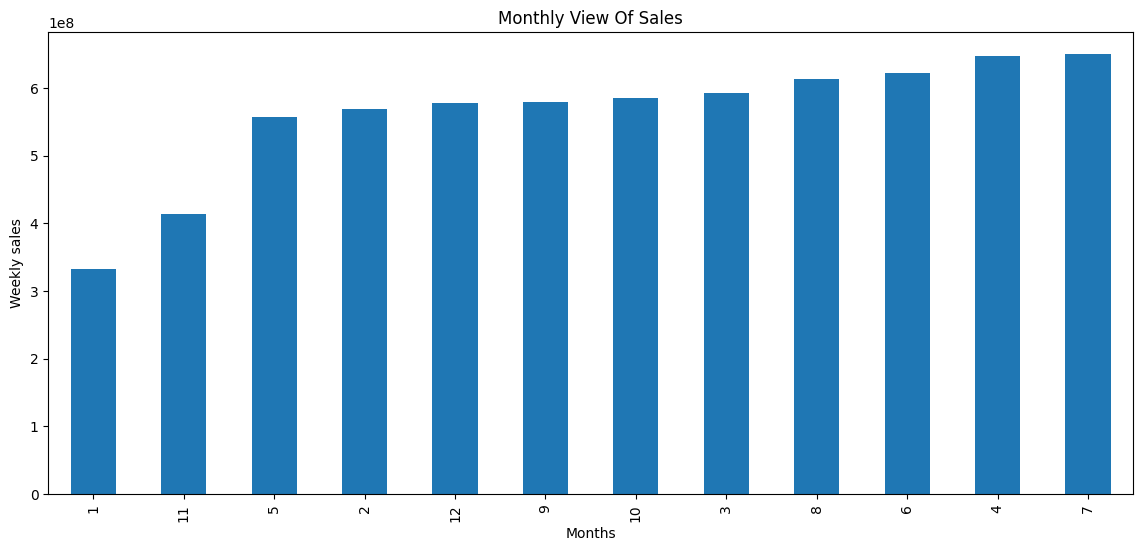

In [18]:
# monthly view of sales
plt.figure(figsize=(14,6))
sales_per_month=walmart.groupby("Month")["Weekly_Sales"].sum().sort_values().plot(kind="bar")
plt.title("Monthly View Of Sales")
plt.xlabel("Months")
plt.ylabel("Weekly sales")

***april and july has highest sales and jan has lowest weekly sale***

Text(0, 0.5, 'Weekly sales')

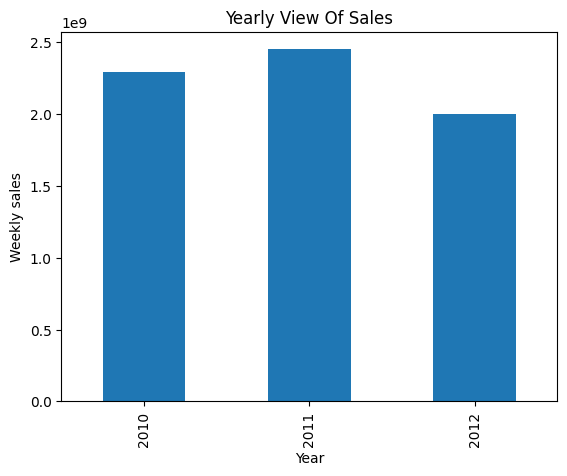

In [19]:
# yearly view of sales
sales_in_per_year=walmart.groupby("Year")["Weekly_Sales"].sum()
sales_in_per_year.plot(kind="bar")
plt.title("Yearly View Of Sales")
plt.xlabel("Year")
plt.ylabel("Weekly sales")

***2011 has highest weekly sales and 2012 has lowest weekly sales***

Text(0, 0.5, 'Weekly sales')

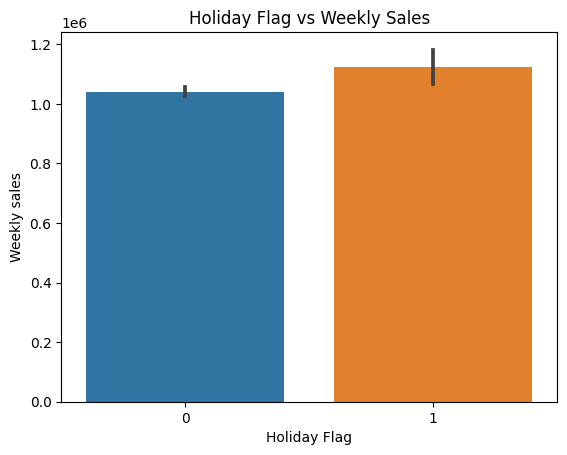

In [20]:
# plot barplot 
sns.barplot(walmart,x='Holiday_Flag',y='Weekly_Sales')
plt.title("Holiday Flag vs Weekly Sales")
plt.xlabel("Holiday Flag")
plt.ylabel("Weekly sales")

***weekly Sales reach their max on holiday flags***


In [21]:
# create dependent and independent variables
x=walmart.drop(["Weekly_Sales"],axis=1)
y=walmart["Weekly_Sales"]

In [22]:
# split train set and test test
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(f" Rows of x train set={len(x_train)}\n Rows of x test set ={len(x_test)}\n Rows of y train={len(y_train)}\n Rows of y test={len(y_test)}")

 Rows of x train set=5148
 Rows of x test set =1287
 Rows of y train=5148
 Rows of y test=1287


#  Model Selection

In [23]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.metrics import mean_absolute_error ,mean_squared_error , r2_score

# create pipeline for linear regression 
pipeline_linear = Pipeline([('scaler', StandardScaler()),
                     ('linear_regression',LinearRegression())])

# cross validation for linear regression

linear_cross_val_scores = cross_val_score(pipeline_linear, x_train, y_train, cv=5)
print(f"linear cross validation scores are:{linear_cross_val_scores}")

linear cross validation scores are:[0.16031377 0.12515825 0.1372358  0.13734602 0.16274271]


In [24]:
# linear regression model fit
pipeline_linear.fit(x_train ,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [25]:
# linear regression prediction
y_pred_linear = pipeline_linear.predict(x_test)
y_pred_linear

# evalution metrics
mse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f" linear regression mean square error: {mse}")
print(f" linear regression mean absolute error: {mae}")
print(f" linear regression R-squared: {r2}")


 linear regression mean square error: 272015121345.4361
 linear regression mean absolute error: 432526.9223197102
 linear regression R-squared: 0.1556378483890245


In [26]:
# create pipeline for random forest regression
pipeline_random =Pipeline([('scaler', StandardScaler()),
                     ('random_forest',RandomForestRegressor())])



# Hyperparameter Tuning

In [27]:
# create grid search for random forest regressor
param_grid= {
    'random_forest__n_estimators': [100],     
    'random_forest__max_depth': [None,5],    
    'random_forest__min_samples_split': [5],     
    'random_forest__min_samples_leaf': [6]  }

grid_search= GridSearchCV(pipeline_random, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=1)

grid_search.fit(x_train,y_train)
    
best_model = grid_search.best_estimator_


# Feature Importance

Text(0.5, 1.0, 'Feature Importance Scores')

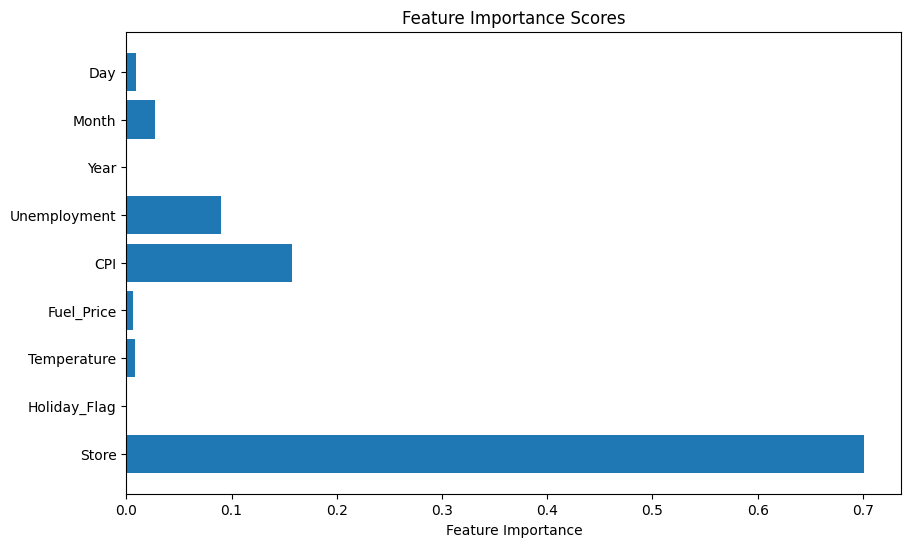

In [28]:
feature_importance_scores = best_model.named_steps['random_forest'].feature_importances_

# Plot feature importances

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_scores)), feature_importance_scores, tick_label=x.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')


In [29]:

# Make predictions on the test data using the best_model
y_pred_random = best_model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_random)
mae = mean_absolute_error(y_test, y_pred_random)
r2 = r2_score(y_test, y_pred_random)

print(f" random forest mean square error: {mse}")
print(f" random forest mean absolute error: {mae}")
print(f" random forest R-squared: {r2}")


 random forest mean square error: 15883430744.608883
 random forest mean absolute error: 65365.65297650179
 random forest R-squared: 0.9506962418407225


Text(0.5, 1.0, 'Linear regression Model')

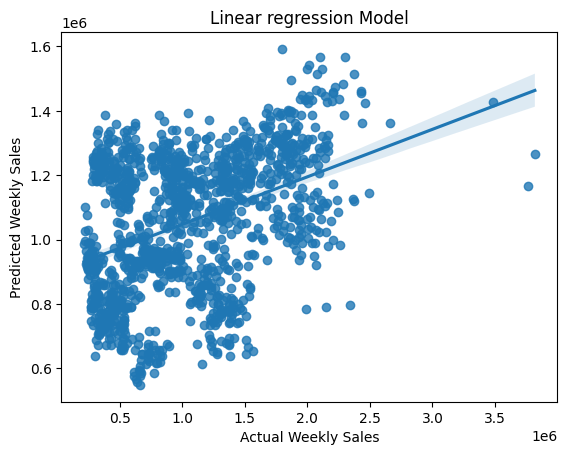

In [30]:

# ploting linear regression model
sns.regplot(x=y_test, y=y_pred_linear)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Linear regression Model")


Text(0.5, 1.0, 'Random Forest Regressor Model')

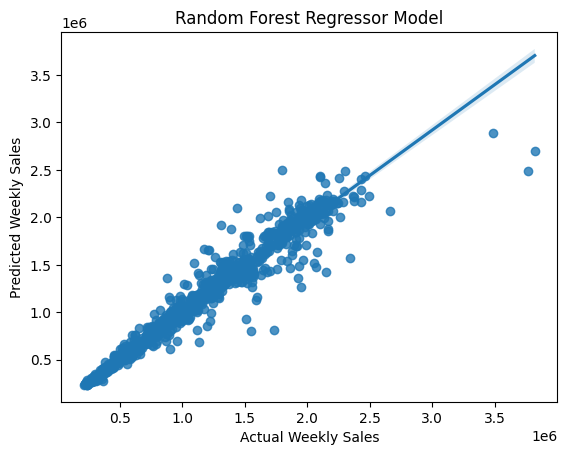

In [31]:
# ploting random forest model
sns.regplot(x=y_test, y=y_pred_random)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Random Forest Regressor Model")


***Conclusion***

***Here, we have used 2 different algorithms to understand which model to use to predict the weekly sales. Linear Regression is not an appropriate model to use as accuracy is very low. However, Random Forest Regression gives accuracy of almost 95% . so, it is the best model to predict weekly sales.***